In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
#creat dataframe for the position
file_path ='Resources/attack_mid_fielders.csv'
attack_mid_fielders_df = pd.read_csv(file_path)
attack_mid_fielders_df['rating'] = (attack_mid_fielders_df['potential']+attack_mid_fielders_df['overall'])/2
attack_mid_fielders_df


,overall,potential,field_position,height,weight,crossing,finishing,heading_accuracy,short_passing,volleys,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,89,90,CAM,5'9,161,82.0,90.0,84.0,83.0,87.0,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,89.5
1,88,89,LAM,5'11,172,90.0,83.0,62.0,89.0,90.0,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,88.5
2,88,91,CAM,5'11,168,88.0,80.0,52.0,91.0,77.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,89.5
3,86,87,CAM,5'11,168,72.0,87.0,77.0,86.0,81.0,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,86.5
4,86,86,CAM,6'1,165,79.0,87.0,82.0,83.0,84.0,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49,61,CAM,6'0,161,41.0,42.0,40.0,40.0,40.0,...,49.0,30.0,40.0,40.0,10.0,8.0,14.0,11.0,11.0,55.0
996,49,59,CAM,6'0,163,40.0,37.0,38.0,60.0,44.0,...,56.0,54.0,36.0,43.0,8.0,11.0,7.0,14.0,11.0,54.0
997,49,70,CAM,5'7,137,35.0,32.0,35.0,56.0,44.0,...,58.0,20.0,38.0,41.0,10.0,6.0,9.0,13.0,6.0,59.5
998,48,70,CAM,5'11,154,31.0,32.0,48.0,51.0,39.0,...,41.0,29.0,32.0,40.0,12.0,8.0,11.0,9.0,12.0,59.0


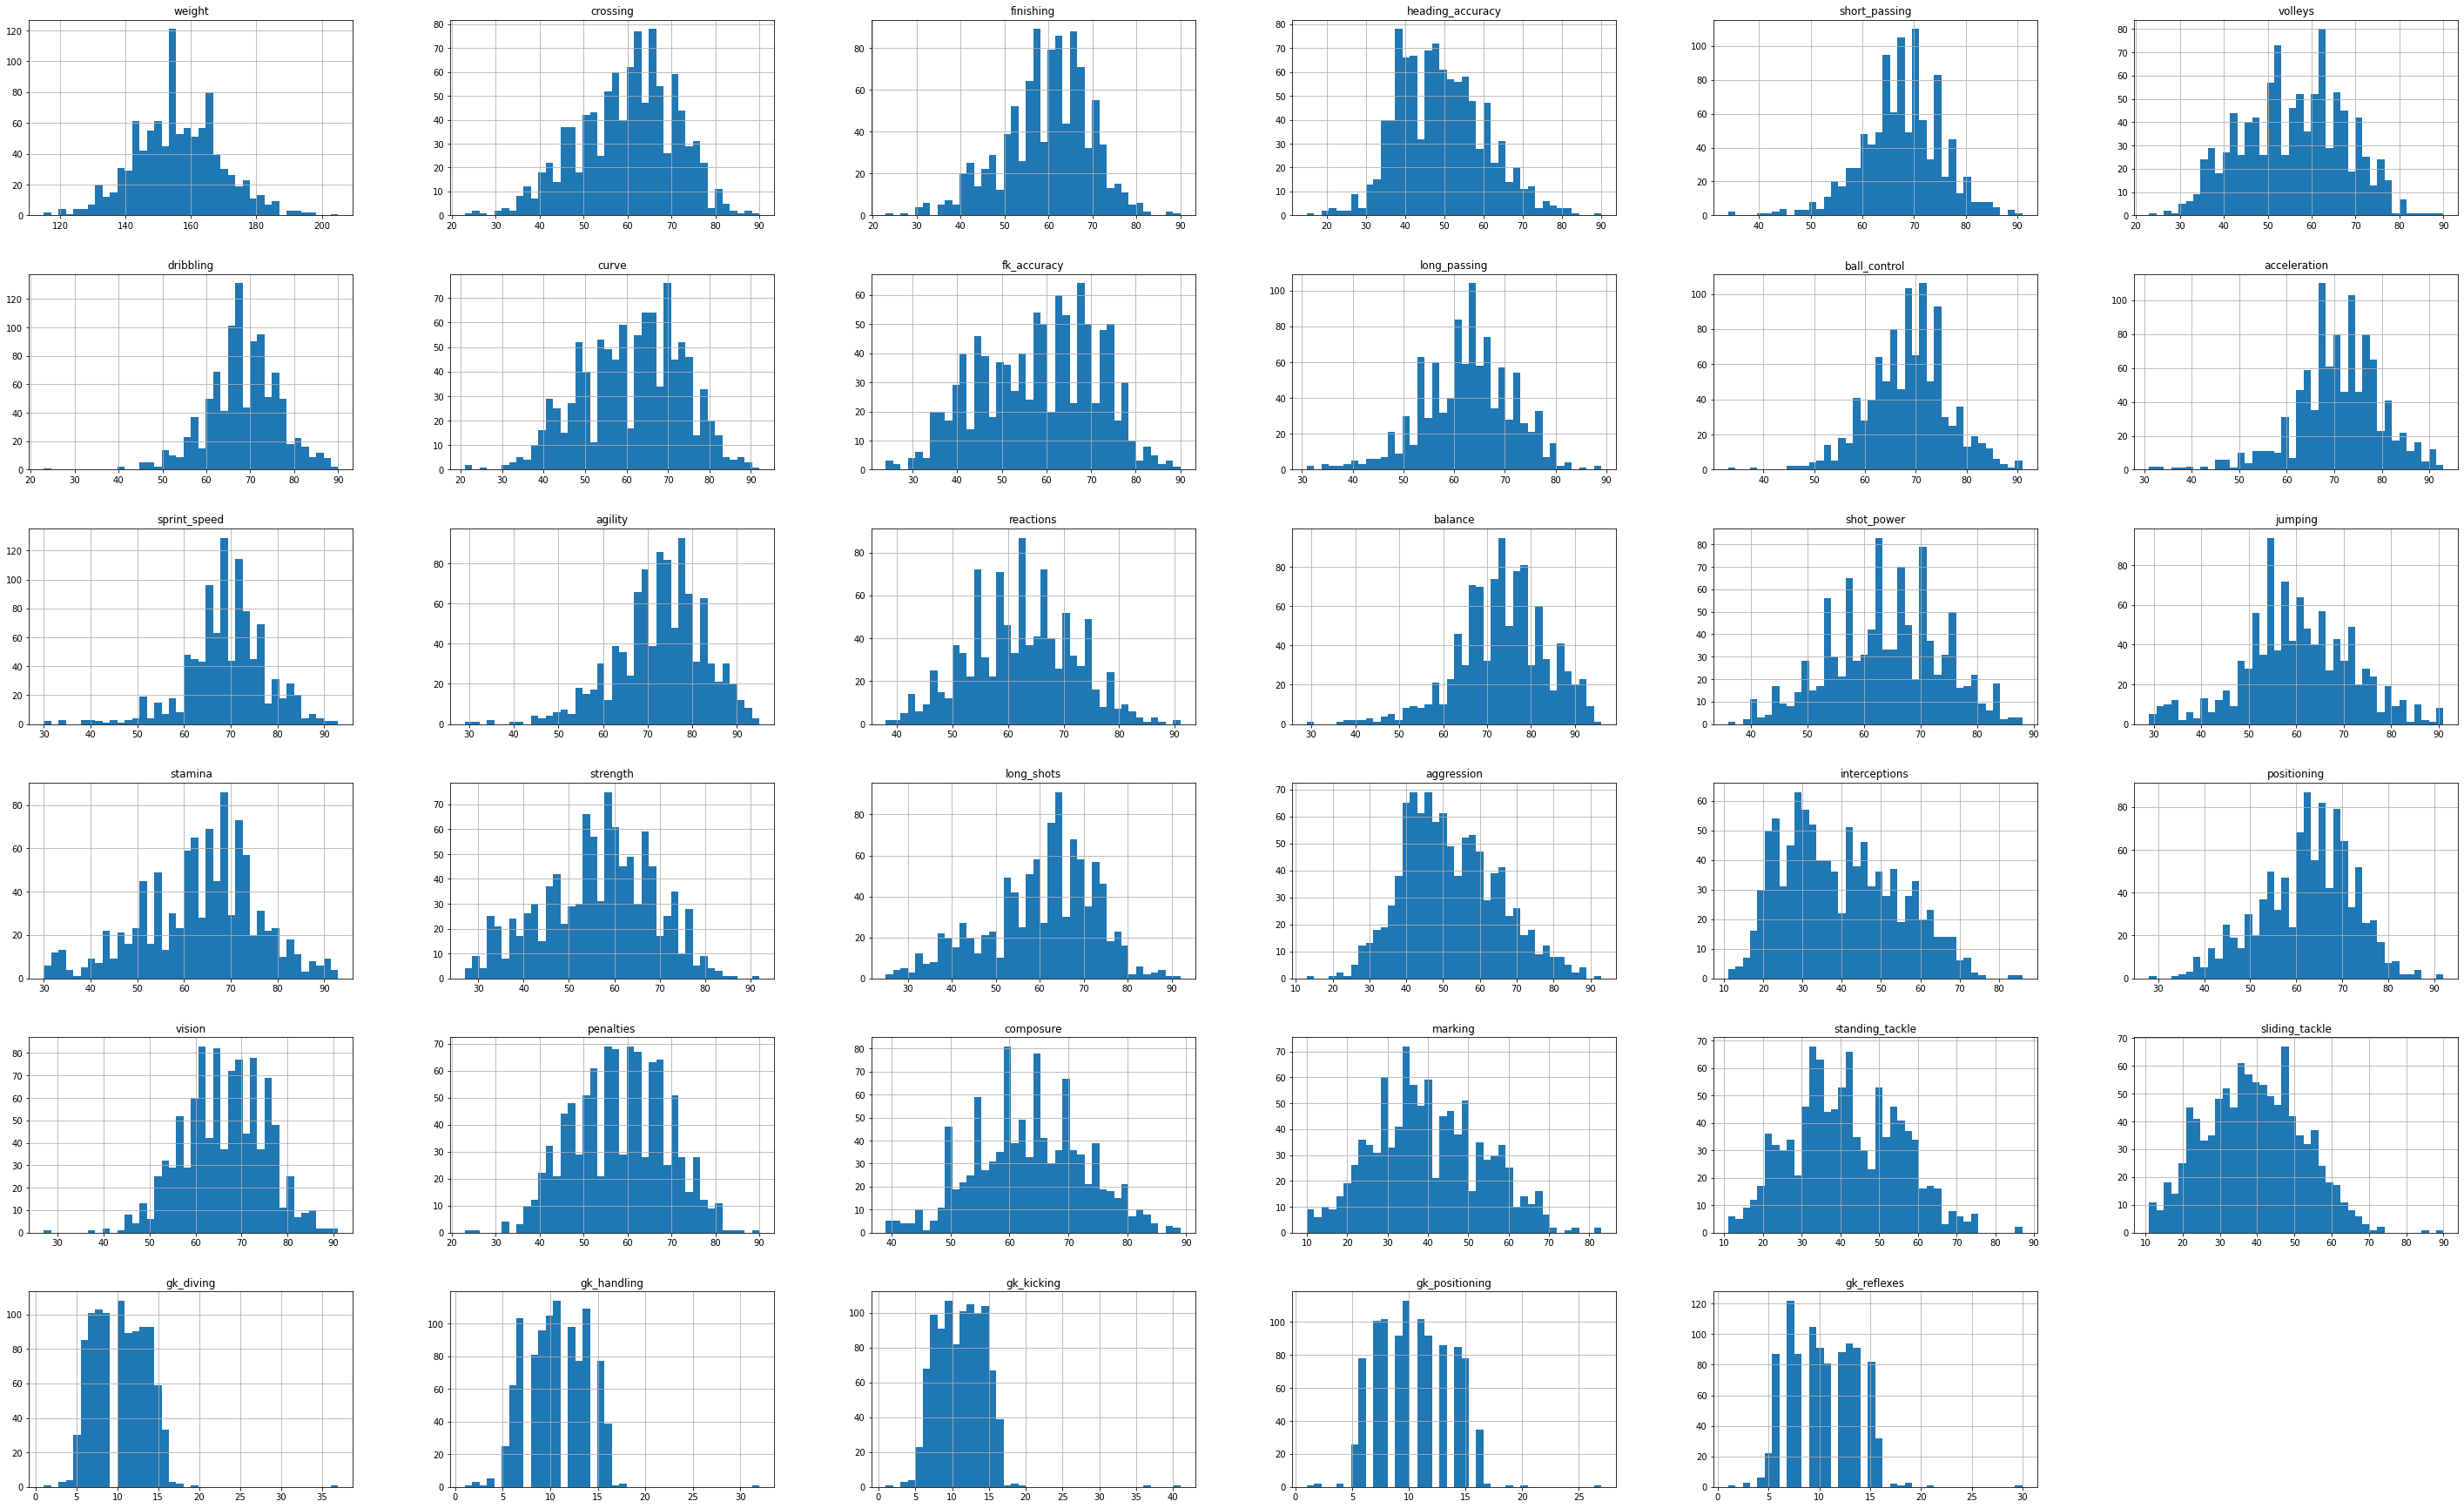

In [4]:
attack_mid_fielders_df.drop(['rating', 'overall', 'potential'], axis = 1).hist(bins=40, figsize=(50,31))
plt.show()

In [5]:
attack_mid_fielders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           1000 non-null   int64  
 1   potential         1000 non-null   int64  
 2   field_position    1000 non-null   object 
 3   height            1000 non-null   object 
 4   weight            1000 non-null   int64  
 5   crossing          1000 non-null   float64
 6   finishing         1000 non-null   float64
 7   heading_accuracy  1000 non-null   float64
 8   short_passing     1000 non-null   float64
 9   volleys           1000 non-null   float64
 10  dribbling         1000 non-null   float64
 11  curve             1000 non-null   float64
 12  fk_accuracy       1000 non-null   float64
 13  long_passing      1000 non-null   float64
 14  ball_control      1000 non-null   float64
 15  acceleration      1000 non-null   float64
 16  sprint_speed      1000 non-null   float64
 

In [6]:
attack_mid_fielders_df.isna().any()

overall             False
potential           False
field_position      False
height              False
weight              False
crossing            False
finishing           False
heading_accuracy    False
short_passing       False
volleys             False
dribbling           False
curve               False
fk_accuracy         False
long_passing        False
ball_control        False
acceleration        False
sprint_speed        False
agility             False
reactions           False
balance             False
shot_power          False
jumping             False
stamina             False
strength            False
long_shots          False
aggression          False
interceptions       False
positioning         False
vision              False
penalties           False
composure           False
marking             False
standing_tackle     False
sliding_tackle      False
gk_diving           False
gk_handling         False
gk_kicking          False
gk_positioning      False
gk_reflexes 

In [7]:
list(attack_mid_fielders_df)

['overall',
 'potential',
 'field_position',
 'height',
 'weight',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rating']

In [8]:
# Define Columns we will include
columns = ['field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking',
    'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rating']

# Fit columns into df
attack_mid_fielders_df = attack_mid_fielders_df[columns]

#Print df
attack_mid_fielders_df

,field_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,CAM,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,89.5
1,LAM,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,88.5
2,CAM,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,89.5
3,CAM,72.0,87.0,77.0,86.0,81.0,87.0,80.0,65.0,75.0,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,86.5
4,CAM,79.0,87.0,82.0,83.0,84.0,75.0,81.0,59.0,72.0,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CAM,41.0,42.0,40.0,40.0,40.0,48.0,42.0,36.0,42.0,...,49.0,30.0,40.0,40.0,10.0,8.0,14.0,11.0,11.0,55.0
996,CAM,40.0,37.0,38.0,60.0,44.0,40.0,47.0,38.0,62.0,...,56.0,54.0,36.0,43.0,8.0,11.0,7.0,14.0,11.0,54.0
997,CAM,35.0,32.0,35.0,56.0,44.0,40.0,49.0,40.0,52.0,...,58.0,20.0,38.0,41.0,10.0,6.0,9.0,13.0,6.0,59.5
998,CAM,31.0,32.0,48.0,51.0,39.0,48.0,36.0,37.0,47.0,...,41.0,29.0,32.0,40.0,12.0,8.0,11.0,9.0,12.0,59.0


In [9]:
#Create train_set and test_set
train_set, test_set = train_test_split(attack_mid_fielders_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(attack_mid_fielders_df))


target_train = train_set['rating'].values.ravel()
train_set = train_set.drop(['rating'], axis = 1)

Length of training data: 800
Length of testing data: 200
Length of total data: 1000


In [10]:
for position_value in attack_mid_fielders_df['field_position'].unique():
    
    corr_matrix = attack_mid_fielders_df[attack_mid_fielders_df['field_position'] == position_value].corr()['rating'].to_frame()
    temp_df = corr_matrix['rating'].sort_values(ascending=False)
    
    print(f'********** Current Position: {position_value}: \n ')
    
    print(temp_df)
    
    print('\n')

    print(f'-------------------------------------------------------------')
    
    print('\n')

********** Current Position: CAM: 
 
rating              1.000000
ball_control        0.872060
dribbling           0.838879
short_passing       0.790233
vision              0.782405
positioning         0.725088
reactions           0.716527
finishing           0.707527
composure           0.695019
long_shots          0.692998
crossing            0.674968
long_passing        0.668923
shot_power          0.639851
curve               0.628656
volleys             0.625326
fk_accuracy         0.576096
penalties           0.512413
stamina             0.424369
agility             0.386748
heading_accuracy    0.299537
interceptions       0.268432
acceleration        0.268130
aggression          0.258747
marking             0.234805
strength            0.217625
sprint_speed        0.216201
standing_tackle     0.209699
balance             0.144951
jumping             0.141014
sliding_tackle      0.100206
gk_positioning      0.007101
gk_reflexes        -0.001049
gk_diving          -0.001761
gk_han

In [12]:
for position in attack_mid_fielders_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = attack_mid_fielders_df[attack_mid_fielders_df['field_position'] == position]
        #temp_df = temp_df.dropna()

        #print(temp_df)
        # Find correlations
        temp_corr = attack_mid_fielders_df[attack_mid_fielders_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: CAM: 
 
 ********* Significant features in order of impact: Index(['const', 'dribbling', 'ball_control', 'short_passing', 'vision',
       'finishing', 'volleys', 'crossing', 'penalties'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     211.3
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          1.09e-264
Time:                        21:28:09   Log-Likelihood:                -1803.0
No. Observations:                 766   AIC:                             3640.
Df Residuals:                     749   BIC:                             3719.
Df Model:                          16                                         
Covariance Type:            nonrobust        

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
